In [1]:
# basic imports.  
import os
import numpy as np
import matplotlib
# use the nbagg backend to render plot.  It provides basic zoom and pan capability.
matplotlib.use('nbagg') # previously I used this magic command: %matplotlib inline
# I think import matplotlib.pyplot must be after matplotlib.use('nbagg') 
import matplotlib.pyplot as plt

In [2]:
# read the files from amazon stoage on internet
os.system('wget https://s3.amazonaws.com/open.source.geoscience/open_data/pgsblended/blended_data.mat') 
os.system('wget https://s3.amazonaws.com/open.source.geoscience/open_data/pgsblended/time_delay_in_ms.mat') 

os.system('wget https://s3.amazonaws.com/open.source.geoscience/open_data/pgsblended/2017_SeismicDeblendingSummary_Final.pdf')
os.system('wget https://www.pgs.com/globalassets/technical-library/whitepapers-library/2017June_Duan_etal_APractical.pdf')

0

In [3]:
os.system('open 2017_SeismicDeblendingSummary_Final.pdf')
os.system('open 2017June_Duan_etal_APractical.pdf')

0

In [4]:
import scipy.io

'''This code shows how to import .mat file (MATLAB format) into dictionary using scipy.io'''
x = scipy.io.loadmat('time_delay_in_ms.mat')
    

In [5]:
print (x.keys())
time_delay_in_ms=x["time_delay_in_ms"]
print ("time_delay_in_ms.shape=",time_delay_in_ms.shape)

dict_keys(['__globals__', '__version__', '__header__', 'time_delay_in_ms'])
time_delay_in_ms.shape= (256, 256)


In [6]:
fig=plt.figure()
plt.plot(time_delay_in_ms)
plt.show()

plt.plot(time_delay_in_ms[1,:])
plt.savefig('delay_time.png',dpi=200,facecolor=fig.get_facecolor())

plt.show()

time_delay_in_ms


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[8088, 7940, 8266, ..., 7867, 8148, 7624],
       [8088, 7940, 8266, ..., 7867, 8148, 7624],
       [8088, 7940, 8266, ..., 7867, 8148, 7624],
       ...,
       [8088, 7940, 8266, ..., 7867, 8148, 7624],
       [8088, 7940, 8266, ..., 7867, 8148, 7624],
       [8088, 7940, 8266, ..., 7867, 8148, 7624]], dtype=uint16)

In [7]:
import h5py

#load .mat file into dictionary x
#seismic = scipy.io.loadmat(filename)

  
#print seismic.keys()
#time_deltays_in_ms=x["time_delay_in_ms"]
#print "time_deltays_in_ms.shape=",time_deltays_in_ms.shape

f=h5py.File('blended_data.mat','r')
print ("keys=",f.keys())

keys= KeysView(<HDF5 file "blended_data.mat" (mode r)>)


In [8]:
blended_data=f['blended_data']

In [9]:
print ('blended_data.shape=',blended_data.shape)

blended_data.shape= (256, 256, 2768)


In [10]:
dummy=plt.hist(blended_data[1,:,:].ravel(),bins=256)
plt.show()

<IPython.core.display.Javascript object>

In [11]:
# uncomment the next line to get information about the blended_data object
#?blended_data[1,:,:].ravel()


In [12]:
dummy=plt.hist(blended_data[1,:,:].ravel(),bins=256, range=(-25,25))
plt.show()

<IPython.core.display.Javascript object>

In [13]:
for shot in range(0,256,64):
    print ("shot=",shot)
    plt.imshow(blended_data[shot,:,0:1000].T,aspect='auto',clim=(-50.,50.))
    plt.show()

shot= 0


<IPython.core.display.Javascript object>

shot= 64


<IPython.core.display.Javascript object>

shot= 128


<IPython.core.display.Javascript object>

shot= 192


<IPython.core.display.Javascript object>

In [14]:
shot=128
print ("shot=",shot)
plt.imshow(blended_data[shot,:40,100:300].T,aspect='auto',clim=(-50.,50.))
plt.show()

shot= 128


<IPython.core.display.Javascript object>

shot= 0


<IPython.core.display.Javascript object>

save shot0.png
shot= 64


<IPython.core.display.Javascript object>

save shot64.png
shot= 128


<IPython.core.display.Javascript object>

save shot128.png
shot= 192


<IPython.core.display.Javascript object>


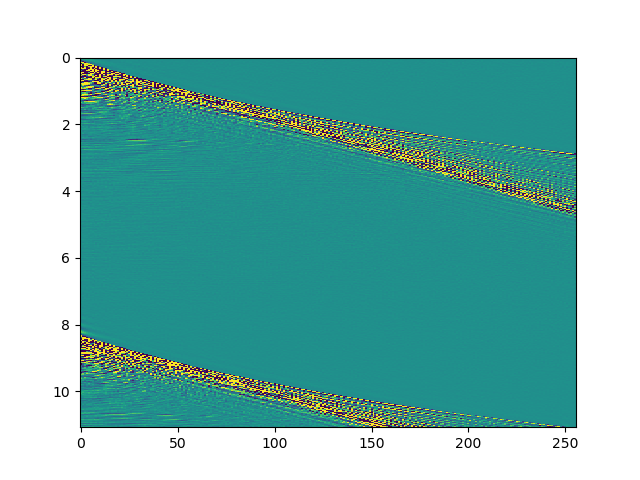

save shot192.png


In [15]:
for shot in range(0,256,64):
    print ("shot=",shot)
    fig=plt.figure()
    
    plt.imshow(blended_data[shot,:,:].T,aspect='auto',clim=(-10.,10),extent=(-.5,256-.5,(2768-.5)*.004,-.5*.004))
    plt.savefig('shot'+str(shot)+'.png')
    plt.show()
    print ('save '+ 'shot'+str(shot)+'.png')
    #    plt.savefig('shot'+str(shot)+'.png',dpi=200,facecolor=fig.get_facecolor())

save ntgshallow.png


<IPython.core.display.Javascript object>


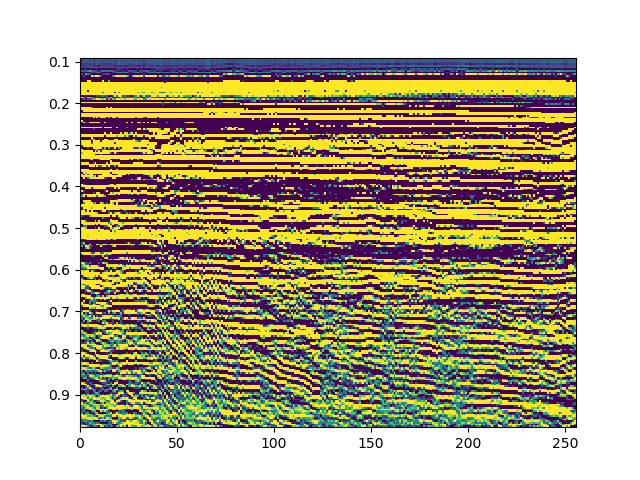

In [17]:
fig=plt.figure()
plt.imshow(blended_data[:,0,0:400].T,aspect='auto',clim=(-10.,10),extent=(-.5,256-.5,(400-.5)*.004,-.5*.004))
print ('save '+ 'ntgshallow.png')
plt.savefig('ntgshallow.png')
plt.show()

In [ ]:
fig=plt.figure()
plt.imshow(blended_data[:,0,1800:2200].T,aspect='auto',clim=(-10.,10),extent=(-.5,256-.5,(2200-.5)*.004,(1800-.5)*.004))
print 'save '+ 'ntgdeep.png'
plt.savefig('ntgdeep.png')
plt.show()

A Practical Method for Multi-source Deblending Using Spatio-temporal Compressive Sensing (Duan, et. al., Expanded Abstracts of the EAGE conference) describes one method to process this data.  The paper is available at:
https://www.pgs.com/globalassets/technical-library/whitepapers-library/2017June_Duan_etal_APractical.pdf